In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


from time import mktime
import matplotlib.ticker as mticker


In [4]:
online_Retail = pd.read_excel(r'D:\Online Retail Data Set.xlsx')

In [7]:
online_Retail.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [8]:
online_Retail.shape

(541909, 8)

In [8]:
online_Retail['Total_Sales'] = online_Retail['UnitPrice'] *online_Retail['Quantity']

In [9]:
online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
print('Min:{}; Max:{}'.format(min(online_Retail.InvoiceDate), max(online_Retail.InvoiceDate)))


Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [11]:
import datetime
snapshot_date = max(online_Retail.InvoiceDate) + datetime.timedelta(days = 1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [12]:
online_Retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total_Sales         0
dtype: int64

In [13]:
online_Retail['Description']= online_Retail['Description'].str.lower()

In [14]:
online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
Retail_country = online_Retail.groupby('Country').agg({'Total_Sales':'sum'}).sort_values(by='Total_Sales', ascending = False)
Retail_country.head(10)

,Total_Sales
Country,
United Kingdom,8187806.364
Netherlands,284661.540
EIRE,263276.820
Germany,221698.210
France,197403.900
Australia,137077.270
Switzerland,56385.350
Spain,54774.580
Belgium,40910.960


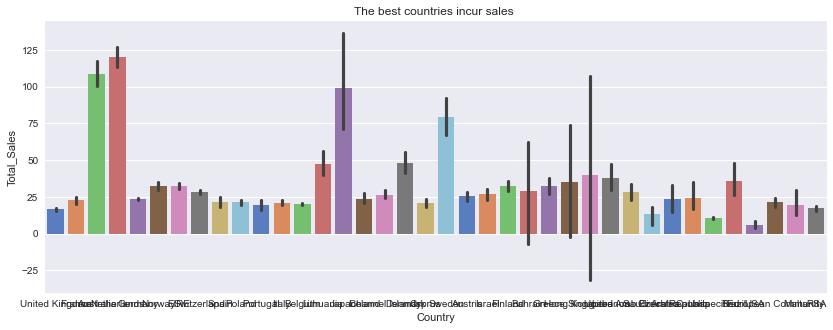

In [26]:
plt.figure(figsize=(14, 5))
sns.barplot(data=online_Retail,
            x="Country",
            y="Total_Sales",
            palette = "muted"
           )

plt.title("The best countries incur sales ")
plt.show()


In [27]:
best_product = online_Retail.groupby('Description').agg({'Quantity':'sum', 'Total_Sales':'sum'})
best_product.sort_values(by ='Quantity', ascending = False).head(10)

,Quantity,Total_Sales
Description,,
world war 2 gliders asstd designs,53847,13587.93
jumbo bag red retrospot,47363,92356.03
assorted colour bird ornament,36381,58959.73
popcorn holder,36334,33969.46
pack of 72 retrospot cake cases,36039,21059.72
white hanging heart t-light holder,35317,99668.47
rabbit night light,30680,66756.59
mini paint set vintage,26437,16810.42
pack of 12 london tissues,26315,7972.76


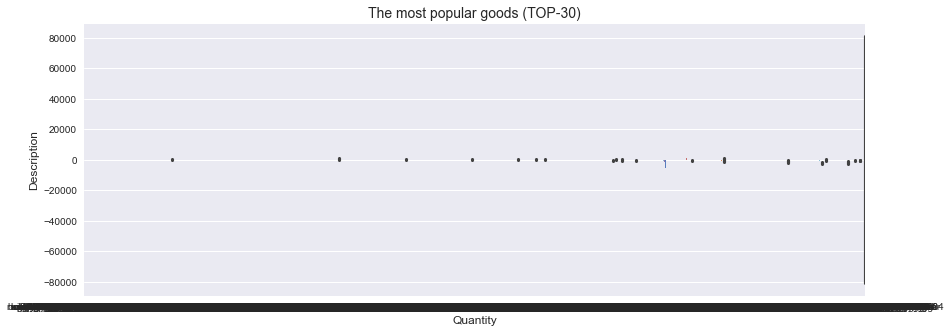

In [28]:
plt.figure(figsize=(14, 5))
sns.barplot(data=online_Retail,
            x="Description",
            y="Quantity",
            palette = "muted"
           )
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Description", fontsize=12)
plt.title("The most popular goods (TOP-30)", fontsize=14)

plt.show()

In [29]:
best_product_country = online_Retail.groupby(['Description','Country']).agg({'Quantity':'sum', 'Total_Sales':'sum'}).sort_values(by ='Quantity', ascending = False)
best_product_country.head(10)

,,Quantity,Total_Sales
Description,Country,,
world war 2 gliders asstd designs,United Kingdom,48326,12055.96
jumbo bag red retrospot,United Kingdom,43167,84516.44
popcorn holder,United Kingdom,34365,32425.81
assorted colour bird ornament,United Kingdom,33679,54662.15
white hanging heart t-light holder,United Kingdom,33193,93953.07
pack of 12 london tissues,United Kingdom,25307,7639.64
pack of 72 retrospot cake cases,United Kingdom,24702,15607.49
victorian glass hanging t-light,United Kingdom,23242,31683.17
brocade ring purse,United Kingdom,22801,5785.47


In [30]:
plt.style.use('seaborn')
fig = Date_product.plot(figsize=(18,8))
plt.ylabel("Total_Sales",{'fontsize':15})
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b-%y"))

NameError: name 'Date_product' is not defined

In [ ]:
Date_product_df = pd.DataFrame(online_Retail.groupby(['InvoiceDate']).agg({'Quantity':'sum', 'Total_Sales':'sum'}).sort_values(by ='Quantity', ascending = False))
Date_product_df

In [ ]:
plt.style.use('seaborn')
fig = Date_product_df.plot(figsize=(18,8))
plt.ylabel("Total Sales",{'fontsize':15})
ax = plt.gca()
plt.title("sales over time ")
plt.plot("InvoiceDate","Total_Sales" , color = 'green')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%y"))

In [ ]:
december = pd.DataFrame({'Date' : pd.date_range(start='2018-12-01', end='2018-12-31'),'sales' : np.zeros((31))}).set_index('Date')


In [ ]:
december.sales = Date_product_df.loc[[i for i in december.index if i in Date_product_df.index]]
december.fillna(0,inplace=True)

In [ ]:
temp_data = online_Retail.copy()

In [ ]:
def get_date_int(df, column):
    """Extract year, month, and day integer values
        
    Args:
        arg_1 (df):
        arg_2 (str): column name with datetime values
    
    Returns:
        int(year), int(months), int(days)
    """
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    quarter = df[column].dt.quarter
    dayofWeek =df[column].dt.dayofweek
    return year, month, day, quarter, dayofweek

In [ ]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})


In [ ]:
#renaming the data values using map function
temp_data["Day of Week"] = temp_data["dayofweek"].map(dayofweek_mapping)


In [ ]:
temp_data.groupby("DayofWeek").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(30, color = 'r', linestyle = '--')
plt.axvline(30, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")


In [ ]:
plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")


In [ ]:
#Plotting the above data
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")


In [ ]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))


In [ ]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()


In [ ]:
#checking for the countries which are available in  2010 and 2011 but not in 2009.

no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))


In [ ]:
online_Retail.groupby(["Country", "Description"]).sum()["Quantity"]


In [ ]:
temp = pd.DataFrame(temp_data)
temp

In [ ]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]
top_8_countries

In [ ]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()


In [ ]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]


In [ ]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    
    plt.tight_layout()

In [ ]:
#K-means Clustering

In [ ]:
# Sample the dataset
online_Retail_selected = online_Retail.sample(10000, random_state = 0)
online_Retail_selected.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler((0,1))
x_scaled = min_max_scaler.fit_transform(rfm_table)
data_scaled = pd.DataFrame(x_scaled)


In [ ]:
# creating a list to store the within-the-cluster-sum-of-squared-distance
wcss = []

# looping over number of clusters and storing wcss
for k in range(0, 10):
  kmeans = KMeans(n_clusters=k+1, random_state=0).fit(df_rfm[['R', 'F', 'M']])
  wcss.append(kmeans.inertia_)

# plotting the wcss wrt cluster numbers
plt.figure(figsize=(15,8))
ax = sns.pointplot(x=list(range(1, 11)), y=wcss)
ax.set_title('K-Means Clustering\nNumber of Clusters vs Within Cluster Sum of Squares')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Cluster Sum of Squares')
plt.show()


In [ ]:
plt.figure(figsize = (12,6))

plt.plot(K_range, wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init =10,max_iter = 300)
kmeans.fit(data_scaled)
cluster = kmeans.predict(data_scaled)


In [ ]:
K_range = range(2,10)
sil_score = []
for i in K_range:
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    labels = kmeans2.fit(data_scaled).labels_
    sil_score.append(silhouette_score(data_scaled, labels))


In [ ]:
plt.figure(figsize = (12,6))

plt.plot(K_range, sil_score , marker='o')
plt.title('Mean Silhouette Coefficient over K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.xticks(K_range)
plt.show()


In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in range(2,8):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # use divmod method to specify ax for our plots
    q, mod = divmod(i, 2)
  
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    # Fit the visualizer
    visualizer.fit(data_scaled)


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(data_scaled)
clusters.shape


In [ ]:
# reducing number of features to 2 using principal component analysis
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data_scaled)
principal_comp


In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()


In [ ]:
# Concatenate the clusters labels to the datafram
pca_cluster_df = pd.concat([pca_df, pd.DataFrame({'clusters': clusters})], axis=1)
pca_cluster_df


In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='pca1', y='pca2', hue = 'clusters', data = pca_cluster_df,
                palette =['red','green','blue'], s=100)
plt.legend(fontsize=12)
plt.show()

In [ ]:
# concatenate clusters to the original dataframe
data_cluster = pd.concat([data_process.reset_index(), pd.DataFrame({'Clusters': clusters})], axis=1)


In [ ]:
# Plot the histogram of various clusters
for i in final_df:
  plt.figure(figsize = (24, 5))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = data_cluster[data_cluster['Clusters'] == j]
    cluster[i].hist(bins=20)
    plt.title(f'{i} \n Cluster {j}')
  
  plt.show()

In [ ]:
sns.pairplot(data_cluster, hue='Clusters', x_vars=['Recency', 'Frequency', 'MonetaryValue'],
            y_vars=['Clusters'], height=5)
plt.show()


In [ ]:
# Create RFM dataframe for each customer:

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


In [ ]:
rfm["Recency_score"] = pd.qcut(rfm["Recency"], 5, labels=[1, 2, 3, 4, 5])
rfm["Frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[5, 4, 3, 2, 1])
rfm["Monetary_score"] = pd.qcut(rfm["Monetary"], 5, labels=[5, 4, 3, 2, 1])
rfm["RFM_SCORE"] = rfm["Recency_score"].astype(str) + rfm["Frequency_score"].astype(str)+ rfm["Monetary_score"].astype(str)
rfm.head()


In [ ]:
#Apriori Market Basket

In [ ]:
basket_France = (online_Retail[online_Retail['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
  
# Transactions done in the United Kingdom
basket_UK = (online_Retail[online_Retail['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
  
# Transactions done in Portugal
basket_Por = (online_Retail[online_Retail['Country'] =="Portugal"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
  
basket_Sweden = (online_Retail[online_Retail['Country'] =="Sweden"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))


In [ ]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
  
# Encoding the datasets
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded
  
basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded
  
basket_encoded = basket_Por.applymap(hot_encode)
basket_Por = basket_encoded
  
basket_encoded = basket_Sweden.applymap(hot_encode)
basket_Sweden = basket_encoded


In [ ]:
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)
  
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


In [ ]:
frq_items = apriori(basket_UK, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

In [ ]:
frq_items = apriori(basket_Por, min_support = 0.05, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


In [ ]:

frq_items = apriori(basket_Sweden, min_support = 0.05, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

In [ ]:
import datetime as dt


In [ ]:
#Cohort Analysis

In [ ]:
def get_month(x): 
    """
    Returns parsed date (YYYY-MM-01)

    Parameters
    ----------
    x: array of dates
    """
    return dt.datetime(x.year, x.month, 1) 


In [ ]:
# InvoiceDay column
online_Retail['InvoiceMonth'] = online_Retail['InvoiceDate'].apply(get_month) 

# Grouping by CustomerID and selecting the InvoiceDay value
grouping = online_Retail.groupby('CustomerID')['InvoiceMonth'] 

# Assigning a minimum InvoiceDay value to the dataset
online_Retail['CohortMonth'] = grouping.transform('min')



In [ ]:
online_Retail.head()


In [ ]:
def get_date_int(df, column):
    """Extract year, month, and day integer values
        
    Args:
        arg_1 (df):
        arg_2 (str): column name with datetime values
    
    Returns:
        int(year), int(months), int(days)
    """
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day


In [ ]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online_Retail, 'InvoiceMonth')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online_Retail, 'CohortMonth')


In [ ]:
# Difference in years between the moment of the invoice and the moment the cohort was created 
years_diff =  invoice_year - cohort_year

# Calculate difference in months between the moment of the invoice and the moment the cohort was created 
months_diff = invoice_month - cohort_month


# Extract the difference in months from all previous values and
# Assign the monthly time offset to each transaction
online_Retail['CohortIndex'] = years_diff * 12 + months_diff + 1
online_Retail.head(3)

In [ ]:
grouping = online_Retail.groupby(['CohortMonth','CohortIndex'])

# Number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

cohort_data['CohortMonth'] = cohort_data.CohortMonth.dt.date

retention = cohort_data.pivot(index='CohortMonth', 
                                  columns='CohortIndex', 
                                  values='CustomerID')

# First column stored as cohort_sizes
cohort_sizes = retention.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = retention.divide(cohort_sizes, axis=0).round(3)


In [ ]:
retention.head(10)

In [ ]:
cohort_sizes.head(10)

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('MONTHLY ACQUISITION COHORT\n')
sns.heatmap(data=cohort_counts, annot=True, cmap='Blues', fmt='.0f', vmin=50, vmax=500);
print()


In [ ]:
retention.head(10)

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('MONTHLY RETENTION RATE (%)\n')
sns.heatmap(data=retention, annot=True, cmap='Blues', fmt='.0f', vmin=10, vmax=50);
print()


In [ ]:
# Churn Rate
churn = 100 - retention

plt.figure(figsize=(12, 8))
plt.title('MONTHLY CHURN RATE\n')
sns.heatmap(data=churn, annot=True, cmap='Blues', fmt='.0f', vmin=50, vmax=90);


In [ ]:
grouping = online_Retail.groupby(['CohortMonth', 'CohortIndex']) 

# Average amount spent by monthly cohort
cohort_data = grouping['Amount'].mean().reset_index()

cohort_data['CohortMonth'] = cohort_data.CohortMonth.dt.date

average_spent = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Amount')

plt.figure(figsize=(12, 8))
plt.title('AVERAGE ORDER VALUE ($)\n')
sns.heatmap(data=average_spent, annot=True, cmap='BuPu', fmt='.1f', vmin=10, vmax=30);


In [ ]:
# Average quantity by monthly cohort
cohort_data = grouping['Quantity'].mean().reset_index()

cohort_data['CohortMonth'] = cohort_data.CohortMonth.dt.date
 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

plt.figure(figsize=(12, 8))
plt.title('AVERAGE QUANTITY ORDER BY MONTHLY COHORTS\n')
sns.heatmap(data=average_quantity, annot=True, cmap='Blues', fmt='.1f');


In [ ]:
# Average of the unit price 
cohort_data = grouping['UnitPrice'].mean().reset_index()

cohort_data['CohortMonth'] = cohort_data.CohortMonth.dt.date

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')

plt.figure(figsize=(12, 8))
plt.title('AVERAGE UNIT PRICE BY MONTHLY COHORTS\n')
sns.heatmap(data=average_price, annot=True, cmap='Greens', fmt='.2f');


In [ ]:
# Mean retention rate 
retention_rate = retention.iloc[:,1:].mean().mean()

# Mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

print(f'Average retention rate: {retention_rate:.1f}%\nAverage churn rate: {churn_rate:.1f}%')


In [ ]:
df_UK = online_Retail[online_Retail['Country'] == "United Kingdom"]
df_UK.head()


In [ ]:
temp=['CustomerID', 'Quantity', 'InvoiceDate', 'Total_Sales']
RFM_data=df_UK[temp]
RFM_data.shape


In [ ]:
NOW = dt.datetime(2011,12,10)
#Convert ORDERDATE to datetime format.
RFM_data['InvoiceDate'] = pd.to_datetime(RFM_data['InvoiceDate'])
# RFM Table


RFM_table = RFM_data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (NOW  - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Sales': 'sum'})
# Rename columns

RFM_table['InvoiceDate'] = RFM_table['InvoiceDate'].astype(int)

RFM_table.rename(columns={'InvoiceDate': 'Recency', 
                         'Quantity': 'Frequency',
                         'Total_Sales': 'Monetary_value'}, inplace=True)
RFM_table.head()


In [ ]:
# we use for loop to plot the probability density curve for each feature separately

plt.figure(figsize=(10,10))
for i in range(len(RFM_table.columns)):
  plt.subplot(3,1,i+1)
  sns.distplot(RFM_table[RFM_table.columns[i]])
  plt.title(RFM_table.columns[i])
plt.tight_layout()

In [ ]:
RFM_table.skew(axis=0)


In [ ]:
from scipy import stats
from sklearn.decomposition import PCA

box_re = stats.boxcox(RFM_table['Recency'])[0]
box_fre = stats.boxcox(RFM_table['Frequency'])[0]


In [ ]:
log_re = np.log(RfM_table['Recency'])
log_fre = np.log(RfM_table['Frequency'])


In [ ]:
fig = plt.figure(figsize=(15,20))
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)

sns.distplot(RfM_table['Recency'], ax=ax0)
sns.distplot(box_re, ax=ax2)
sns.distplot(log_re, ax=ax4)
sns.distplot(RfM_table['Frequency'], ax=ax1)
sns.distplot(box_fre, ax=ax3)
sns.distplot(log_fre, ax=ax5)

ax0.set_title('Original Recency Distribution')
ax1.set_title('Original Frequency Distribution')
ax2.set_title('Box-Cox Distribution')
ax3.set_title('Box-Cox Distribution')
ax4.set_title('Logarithmic Distribution')
ax5.set_title('Logarithmic Distribution')

plt.show()


In [ ]:
cb_MV = np.cbrt(RFM_table['Monetary_value']).values


In [ ]:
cb_MV = np.cbrt(RFM_table['Monetary_value']).values
fig = plt.figure(figsize=(20,6))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
sns.kdeplot(RFM_table['Monetary_value'], ax=ax0)
sns.kdeplot(cb_MV, ax=ax1)

plt.show()

In [ ]:
RFM_table[RFM_table['monetary_value']<0]


In [ ]:
final_df = pd.DataFrame({'Recency': box_re, 
                         'Frequency': box_fre, 
                          'MonetaryValue': cb_MV})
final_df.head()

In [ ]:
final_df.skew()


In [ ]:
# CLTV = (Customer_Value / Churn_Rate) x Profit_margin.
# Customer_Value = Average_Order_Value * Purchase_Frequency
# Average_Order_Value = Total_Revenue / Total_Number_of_Orders
# Purchase_Frequency =  Total_Number_of_Orders / Total_Number_of_Customers
# Churn_Rate = 1 - Repeat_Rate
# Profit_margin


In [ ]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles


In [ ]:
#RFM score values 
RFM_table['RecencyScore'] = pd.qcut(RFM_table['Recency'],5,labels=[5,4,3,2,1])
RFM_table['FrequencyScore'] = pd.qcut(RFM_table['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
RFM_table['MonetaryScore'] = pd.qcut(RFM_table['Monetary_value'],5,labels=[1,2,3,4,5])


In [ ]:
#RFM score values are combined side by side in str format
(RFM_table['RecencyScore'].astype(str) + 
 RFM_table['FrequencyScore'].astype(str) + 
 RFM_table['MonetaryScore'].astype(str)).head()


In [ ]:
#calculation of the RFM score
RFM_table["RFM_SCORE"] = rfm_table['RecencyScore'].astype(str) + rfm_table['FrequencyScore'].astype(str) + rfm_table['MonetaryScore'].astype(str)


In [ ]:
#transposition of the RFM table. This makes it easier to evaluate.
RFM_table.describe().T


In [ ]:
#customers with RFM Score 555
RFM_table[RFM_table["RFM_SCORE"] == "555"].head()


In [ ]:
#customers with RFM Score 111
RFM_table[RFM_table["RFM_SCORE"] == "111"].head()


In [ ]:
seg_map = {
            r'111': 'Champions',
            r'113': 'Promising',
            r'114': 'Potential Loyalist',
            r'144': 'New Customers',
            r'312': 'Loyal Customers',
            r'442': 'Can not loose them',
            r'443': 'Need Attention',
            r'552': 'About to Sleep',
            r'553': 'Hibernating',
            r'554': 'At Risk',
            r'555': 'Lost'
        }

seg_map2 = {
        r'[1-5][1-5][1-5]': 'Others_Segment',
         }




In [ ]:
#creation of segment variable
rfm["RFM_Segment"] = rfm["RFM_SCORE"].replace(seg_map, regex=True)
rfm["RFM_Segment"] = rfm["RFM_Segment"].replace(seg_map2, regex=True)
rfm.reset_index()
rfm.tail()


In [ ]:
rfm_table[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])


In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)


In [ ]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))


In [ ]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
#Traditional CLV method doens't require to define customer lifespan and instead uses retention to churn rate to access customer life expectancy.
#Traditional CLV = Average Revenue * Retention Rate / Churn Rate



In [ ]:
online_Retail['YearMonth'] = online_Retail['InvoiceDate'].dt.strftime("%Y-%m")
online_Retail['YearMonth'] = pd.to_datetime(online_Retail['YearMonth'])


In [ ]:
# calculate monthly spend per customer
monthly_revenue = online_Retail.groupby(by=['CustomerID', 'YearMonth'])['Total_Sales'].sum().mean()
monthly_revenue

In [ ]:
lifespan_months = 36



In [ ]:
CLV_basic = monthly_revenue * lifespan_months
CLV_basic

In [ ]:
#Granular CLV = (Average Revenue per Transaction Average Frequency) Average Lifespan



In [ ]:
# first mean() averages the revenue per invoice 
# second mean() averages the revenue per purchase
revenue_per_purchase = online_Retail.groupby(by=['InvoiceNo'])['Total_Sales'].mean().mean()
revenue_per_purchase


In [ ]:
# calculate average number of unique invoices per customer each month
avg_frequency_per_month = online_Retail.groupby(by=['CustomerID', 'YearMonth'])['InvoiceNo'].nunique().mean()
avg_frequency_per_month

In [ ]:
CLV_granular = revenue_per_purchase * avg_frequency_per_month * lifespan_months
CLV_granular

In [ ]:
# calculate monthly spend per customer
monthly_revenue = online_Retail.groupby(by=['CustomerID', 'YearMonth'])['Total_Sales'].sum().mean()
monthly_revenue

In [ ]:
#calculate average retention rate per customer
avg_retention = retention.iloc[:, 1:].mean().mean()
avg_retention

In [ ]:
avg_churn = 1 - avg_retention
avg_churn

In [ ]:
CLV_traditional = monthly_revenue * (avg_retention/avg_churn)
CLV_traditional

In [ ]:
print("Average CLV: {:.2f} USD at {:.1%} average retention rate and {:.2f} USD average monthly revenue".format(CLV_traditional, avg_retention, monthly_revenue))


In [22]:
online_Retail.to_csv('online_Retail.csv')